In [105]:
import numpy as np
import pandas as pd
import talib as ta
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'

START_DATE = '2021/1/1'
END_DATE = '2022/1/1'

In [115]:
data = web.DataReader("AMZN", "yahoo")

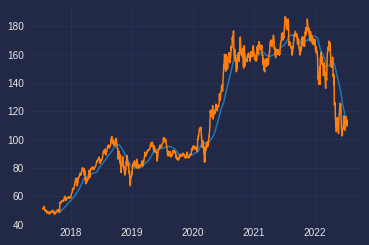

In [117]:
#Simple Moving Average
data['SMA_50'] = ta.SMA(data['Close'], 50)

plt.plot(data['SMA_50'])
plt.plot(data['Close'])
plt.grid(color='#2A3459')
plt.show()